<a href="https://colab.research.google.com/github/vaishnavisingh51-git/GUVI_Agmnts_otherCodes/blob/main/House_price_predicton_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Chennai** **House** **Price** **Prediction**

1. Problem Statement
2. Data
3. Minimum Requirements

##Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


##Data

The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

##Minimum Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate

##Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Loading The Dataset

In [ ]:
#Read the data 
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


The dataset contains 22 columns and 7109 rows

In [ ]:
df.shape

(7109, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df=df.drop(columns="PRT_ID")


In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


##1.Area

In [ ]:
df["AREA"].isnull().sum()

0

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df["AREA"] = df["AREA"].replace({"Adyr":"Adyar", "Ana Nagar":"Anna Nagar", "Ann Nagar":"Anna Nagar", "Karapakam":"Karapakkam", "Velachery":"Velchery", "Chrmpet":"Chrompet", "Chrompt":"Chrompet", "Chormpet":"Chrompet", "TNagar":"T Nagar", "KKNagar":"KK Nagar"})

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velchery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velchery       981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [ ]:
# plot histogram
fig = px.histogram(df, x=["AREA"])
fig.show()

By seeing this histogram , Chrompet as highest vaule and least value is T Nagar

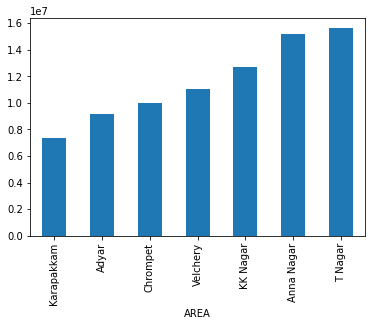

In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

When area changes sales price changes- there is very good linear relationship between area and sales price

In [ ]:
#encode-label encoding(ordinal)
Area={'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velchery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6}


In [ ]:
df.AREA=df.AREA.replace(Area)

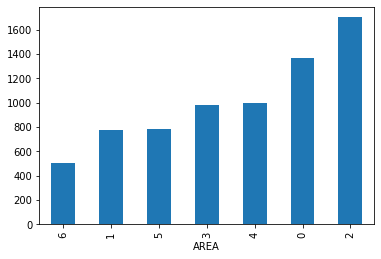

In [ ]:
df.groupby("AREA")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

Chrompet as very good sales price and least sales price is at T Nagar

##INT_SQFT

In [ ]:
df.INT_SQFT.values

array([1004, 1986,  909, ..., 1614,  787, 1896])

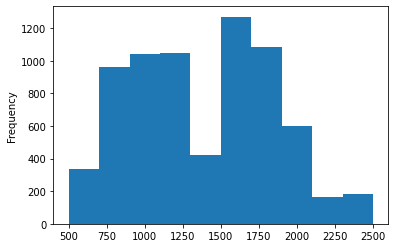

In [ ]:
df.INT_SQFT.plot(kind ='hist')

In [ ]:
df.INT_SQFT.isnull().sum()

0

In [ ]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [ ]:
q3 = df.INT_SQFT.quantile(0.75)
q1 = df.INT_SQFT.quantile(0.25)
iqr=q3-q1
iqr

751.0

In [ ]:
print(q3+1.5*iqr)
print(q1-1.5*iqr)

2870.5
-133.5


There is no outliers 

In [ ]:
fig = px.scatter(df, x='INT_SQFT', y='SALES_PRICE')
fig.show()

Sales price changes based on the square feet

#3.DATE_SALE

In [ ]:
df.DATE_SALE.values

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '25-08-2006',
       '03-08-2009', '13-07-2005'], dtype=object)

In [ ]:
df.DATE_SALE.dtype

dtype('O')

the data type is object , first we need convert the date to datetime format

In [ ]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [ ]:
df['Sale_year']=pd.DatetimeIndex(df['DATE_SALE']).year

In [ ]:
df.Sale_year.isnull().sum()  

0

In [ ]:
# plot histogram
fig = px.histogram(df, x=["Sale_year"])
fig.show()

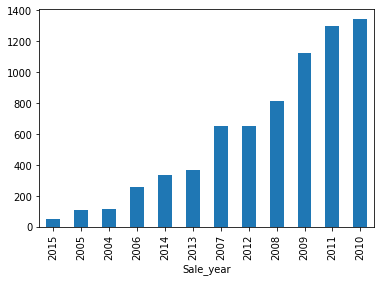

In [ ]:
df.groupby("Sale_year")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

In 2010 there is a highest sales ,in 2015 is a least sales.

##4.DIST_MAINROAD

In [ ]:
df.DIST_MAINROAD.values

array([131,  26,  70, ..., 152,  40, 156])

In [ ]:
df.DIST_MAINROAD.isnull().sum()  

0

In [ ]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [ ]:
q3 = df.DIST_MAINROAD.quantile(0.75)
q1 = df.DIST_MAINROAD.quantile(0.25)
iqr=q3-q1
iqr

98.0

In [ ]:
print(q3+1.5*iqr)
print(q1-1.5*iqr)

295.0
-97.0


NO OUTLIERS ANS NULL VALUES

In [ ]:
# plot histogram
fig = px.histogram(df, x='DIST_MAINROAD')
fig.show()

In [ ]:
fig = px.scatter(df, x='DIST_MAINROAD', y='SALES_PRICE')
fig.show()

sales price varies for different dist_mainroad

##5.N_BEDROOM

In [ ]:
df.N_BEDROOM.values

array([1., 2., 1., ..., 2., 1., 3.])

In [ ]:
df.N_BEDROOM.isnull().sum() 

1

In [ ]:
x=df.N_BEDROOM.mode()

df.N_BEDROOM.fillna(int(x), inplace=True)

In [ ]:
df.N_BEDROOM.isnull().sum()  

0

In [ ]:
df.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [ ]:
#PLOT HISTOGRAM
fig = px.histogram(df, x=["N_BEDROOM"])
fig.show()

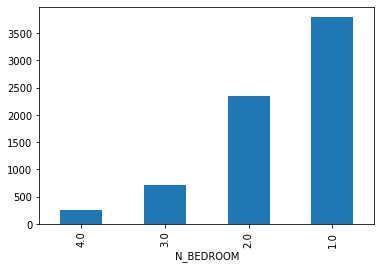

In [ ]:
df.groupby("N_BEDROOM")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

Sales price changes for each number of bedroom

##6.N_BATHROOM

In [ ]:
df.N_BATHROOM.values

array([1., 1., 1., ..., 1., 1., 2.])

In [ ]:
df.N_BATHROOM.isnull().sum()  

5

In [ ]:
x=df.N_BATHROOM.mode()

df.N_BATHROOM.fillna(int(x), inplace=True)

In [ ]:
df.N_BATHROOM.isnull().sum()  

0

In [ ]:
df.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

In [ ]:
fig = px.histogram(df, x=["N_BATHROOM"])
fig.show()

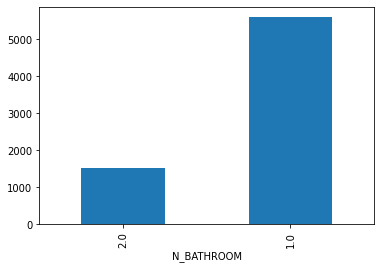

In [ ]:
df.groupby("N_BATHROOM")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

sales price changes for number of bathroom

##7.N_ROOM

In [ ]:
df.N_ROOM.values

array([3, 5, 3, ..., 4, 2, 5])

In [ ]:
df.N_ROOM.isnull().sum()  

0

In [ ]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [ ]:
fig = px.histogram(df, x=["N_ROOM"])
fig.show()

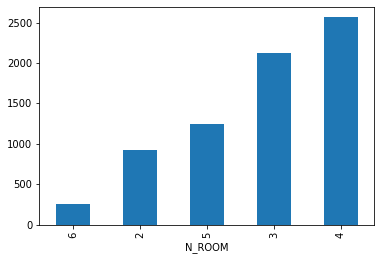

In [ ]:
df.groupby("N_ROOM")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

sales price changes for different number of rooms

##8. SALE_COND	

In [ ]:
df.SALE_COND.values

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal Sale', 'Partial',
       'Partial'], dtype=object)

In [ ]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df["SALE_COND"] = df["SALE_COND"].replace({"AbNormal":"Ab Normal", "Partiall":"Partial", "PartiaLl":"Partial", "AdjLand":"Adj Land"})

In [ ]:
df.SALE_COND.unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
df.SALE_COND.isnull().sum() 

0

In [ ]:
fig = px.histogram(df, x=["SALE_COND"])
fig.show()

THERE IS A LINEAR RELATIONSHIP ,LABEL ENCODING IS DONE

In [ ]:
#encode-label encoding(ordinal)
Sale_cond={'Partial':0, 'Family':1, 'Ab Normal':2, 'Normal Sale':3, 'Adj Land':4}

In [ ]:
df.SALE_COND=df.SALE_COND.replace(Sale_cond)

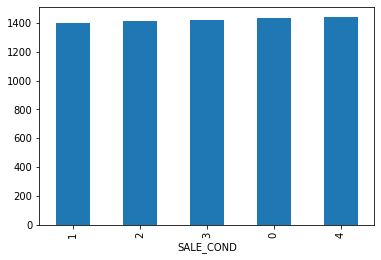

In [ ]:
df.groupby("SALE_COND")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

As sales price changes , slightly sales condition changes

##9.PARK_FACIL

In [ ]:
df.PARK_FACIL.values

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [ ]:
df.PARK_FACIL.isnull().sum()

0

In [ ]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

THERE IS A LINEAR RELATIONSHIP, IT IS A BINARY CATEGORICAL FEATURE

In [ ]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"Yes":1,"Noo":0, "No":0})

In [ ]:
df.PARK_FACIL.value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [ ]:
fig = px.histogram(df, x=["PARK_FACIL"])
fig.show()

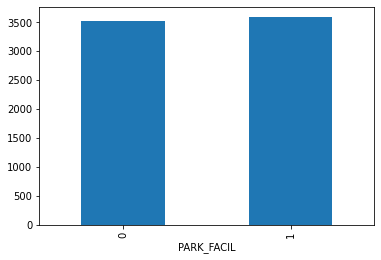

In [ ]:
df.groupby("PARK_FACIL")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##10.DATE_BUILD

In [ ]:
df.DATE_BUILD.values

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [ ]:
df.DATE_BUILD.isnull().sum()

0

In [ ]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)

In [ ]:
df['Build_year']=pd.DatetimeIndex(df['DATE_BUILD']).year

In [ ]:
fig = px.histogram(df, x=["Build_year"])
fig.show()

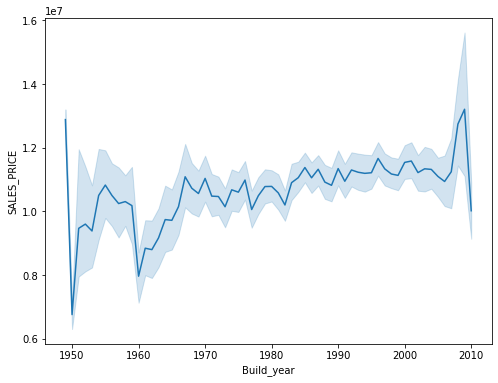

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Build_year,y=df.SALES_PRICE)

As the number of year increases, the sales price also increases

In [ ]:
df['Age']=df['Sale_year']-df['Build_year']

In [ ]:
df['Age'] 

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: Age, Length: 7109, dtype: int64

##11.Age

In [ ]:
df.Age.values

array([44, 11, 20, ..., 28, 32, 44])

In [ ]:
df.Age.describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: Age, dtype: float64

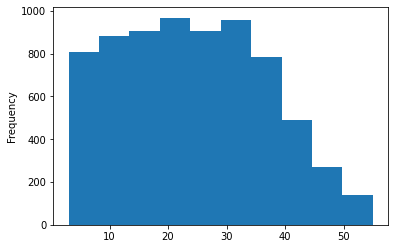

In [ ]:
df.Age.plot(kind='hist')

In [ ]:
df = df.drop(columns=["Sale_year", "Build_year", "DATE_SALE", "DATE_BUILD"])

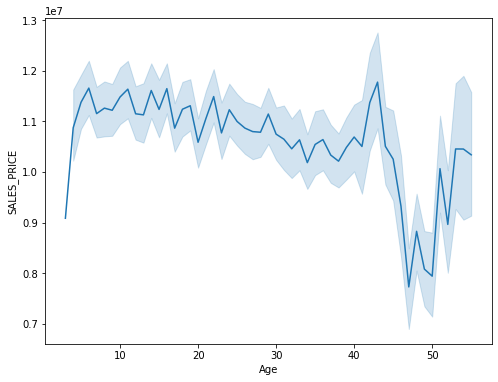

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Age,y=df.SALES_PRICE)

There is a fluctuation between the age and the sales price

##12.BUILDTYPE

In [ ]:
df.BUILDTYPE.values

array(['Commercial', 'Commercial', 'Commercial', ..., 'House',
       'Commercial', 'Others'], dtype=object)

In [ ]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({"Comercial":"Commercial", "Other":"Others"})

In [ ]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [ ]:
fig = px.bar(df, x=["BUILDTYPE"])
fig.show()

In [ ]:
df.BUILDTYPE.isnull().sum()

0

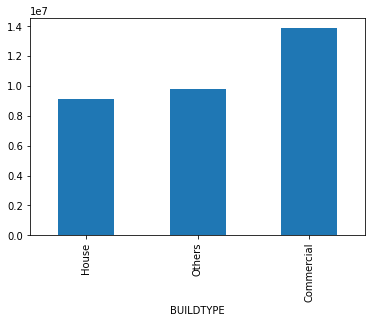

In [ ]:
df.groupby("BUILDTYPE")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

There is no linear relationship , so we need to do one hot encoding

In [ ]:
df = pd.get_dummies(df,columns=["BUILDTYPE"])

In [ ]:
df.BUILDTYPE_Commercial.isnull().sum()

0

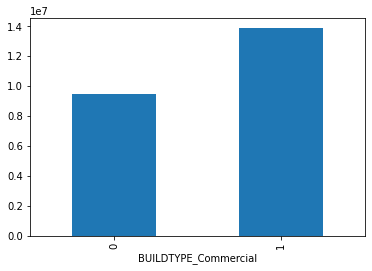

In [ ]:
df.groupby("BUILDTYPE_Commercial")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

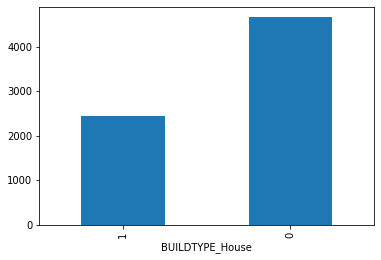

In [ ]:
df.groupby("BUILDTYPE_House")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

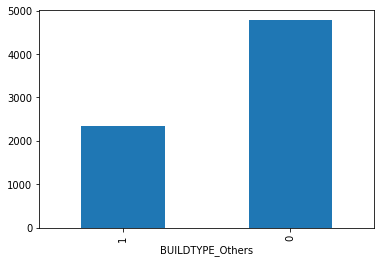

In [ ]:
df.groupby("BUILDTYPE_Others")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##13.UTILITY_AVAIL

In [ ]:
df.UTILITY_AVAIL.values

array(['AllPub', 'AllPub', 'ELO', ..., 'NoSeWa', 'ELO', 'ELO'],
      dtype=object)

In [ ]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({"AllPub":"All Pub"})

In [ ]:
df.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
df.UTILITY_AVAIL.value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
fig = px.histogram(df, x=["UTILITY_AVAIL"])
fig.show()

In [ ]:
df.UTILITY_AVAIL.isnull().sum()

0

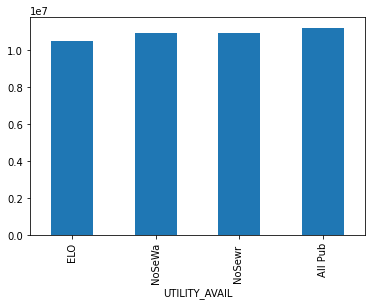

In [ ]:
df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

there is no linear relationship, one hot encoding

In [ ]:
df = pd.get_dummies(df,columns=["UTILITY_AVAIL"])

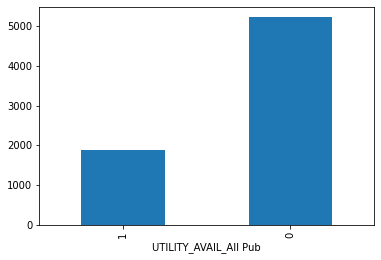

In [ ]:
df.groupby("UTILITY_AVAIL_All Pub")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

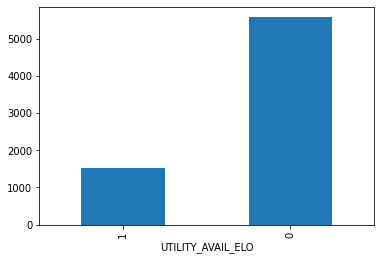

In [ ]:
df.groupby("UTILITY_AVAIL_ELO")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

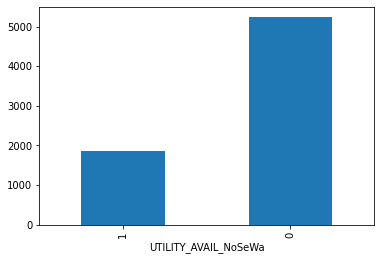

In [ ]:
df.groupby("UTILITY_AVAIL_NoSeWa")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

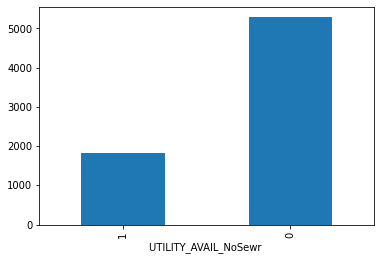

In [ ]:
df.groupby("UTILITY_AVAIL_NoSewr ")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##14.STREET

In [ ]:
df.STREET.values

array(['Paved', 'Gravel', 'Gravel', ..., 'Gravel', 'Paved', 'Paved'],
      dtype=object)

In [ ]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df.STREET.isnull().sum()

0

In [ ]:
df["STREET"]=df["STREET"].replace({"NoAccess":"No Access", "Pavd":"Paved"})

In [ ]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [ ]:
fig = px.histogram(df, x=["STREET"])
fig.show()

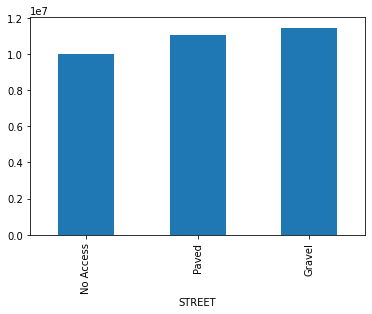

In [ ]:
df.groupby("STREET")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

There is a linear relationship, label encoding

In [ ]:
Street={'No Access':0, 'Paved':1, 'Gravel':2}

In [ ]:
df.STREET=df.STREET.replace(Street)

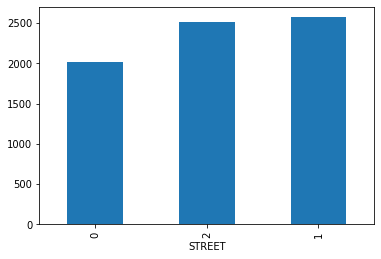

In [ ]:
df.groupby("STREET")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##15.MZZONE

In [ ]:
df.MZZONE.values

array(['A', 'RH', 'RL', ..., 'I', 'RL', 'I'], dtype=object)

In [ ]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df.MZZONE.isnull().sum()

0

In [ ]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [ ]:
fig=px.histogram(df, x=['MZZONE'])
fig.show()

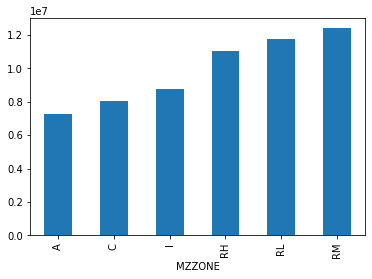

In [ ]:
df.groupby("MZZONE")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

THERE IS A LINEAR REALTIONSHIP  between SALES PRICE AND MZZONE, LABEL ENCODING

In [ ]:
#LABEL ENCODING
Mzzone={"A":0, "C":1, "I":2, "RH":3, "RL":4, "RM":5}

In [ ]:
df.MZZONE =df.MZZONE.replace(Mzzone)

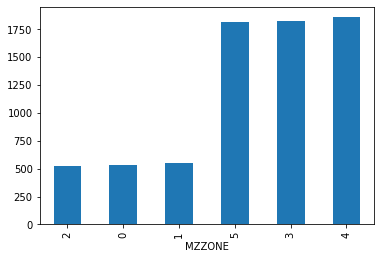

In [ ]:
df.groupby("MZZONE")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##16.QS_ROOMS

In [ ]:
df.QS_ROOMS.values

array([4. , 4.9, 4.1, ..., 4.3, 4.6, 3.1])

In [ ]:
df.QS_ROOMS.isnull().sum()

0

In [ ]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [ ]:
df.QS_ROOMS.value_counts()

2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
3.4    240
4.7    239
3.3    239
4.8    239
4.2    239
2.6    237
2.1    236
3.1    230
5.0    228
3.0    228
3.5    227
2.8    226
4.3    225
2.3    224
4.1    222
2.9    220
4.4    219
4.5    218
4.0    218
2.2    213
2.4    208
3.2    208
3.7    205
2.0    203
2.7    200
Name: QS_ROOMS, dtype: int64

In [ ]:
fig=px.histogram(df, x=['QS_ROOMS'])
fig.show()

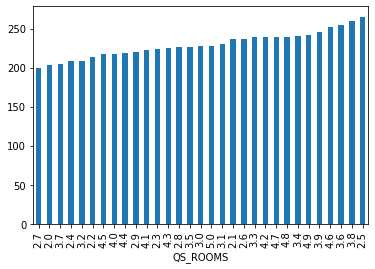

In [ ]:
df.groupby("QS_ROOMS")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##17.QS_BATHROOM

In [ ]:
df.QS_BATHROOM.values

array([3.9, 4.2, 3.8, ..., 4.2, 3.8, 3.5])

In [ ]:
df.QS_BATHROOM.isnull().sum()

0

In [ ]:
df.QS_BATHROOM.value_counts()

2.7    256
4.8    255
3.7    251
4.7    247
4.9    245
3.0    241
4.2    237
4.6    234
3.4    234
2.2    234
2.5    233
4.0    232
3.1    232
4.5    231
2.4    230
2.9    228
3.3    227
3.2    226
2.6    226
3.5    225
2.1    224
4.3    224
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: QS_BATHROOM, dtype: int64

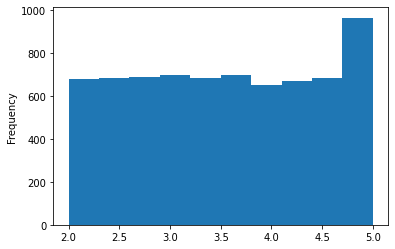

In [ ]:
df.QS_BATHROOM.plot(kind='hist')

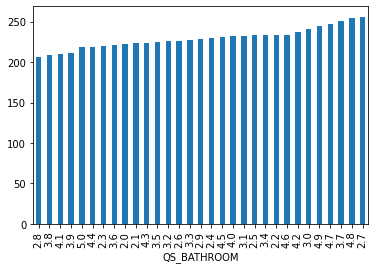

In [ ]:
df.groupby("QS_BATHROOM")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##18.QS_BEDROOM

In [ ]:
df.QS_BEDROOM.values

array([4.9, 2.5, 2.2, ..., 2.9, 4.1, 4.3])

In [ ]:
df.QS_BEDROOM.isnull().sum()

0

In [ ]:
df.QS_BEDROOM.value_counts()

2.6    273
3.2    253
4.0    248
2.4    244
3.8    244
3.1    243
2.1    242
3.0    241
3.4    239
4.3    237
4.4    237
3.5    237
2.2    237
3.3    234
4.6    233
4.7    228
4.5    227
2.5    226
3.6    225
4.1    223
2.7    222
2.0    221
3.9    220
2.9    219
5.0    217
4.2    212
4.8    211
2.8    210
3.7    203
4.9    203
2.3    200
Name: QS_BEDROOM, dtype: int64

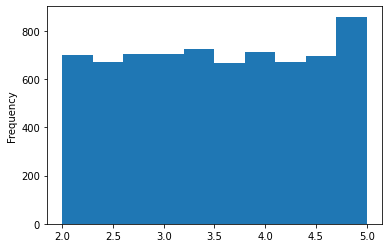

In [ ]:
df.QS_BEDROOM.plot(kind='hist')

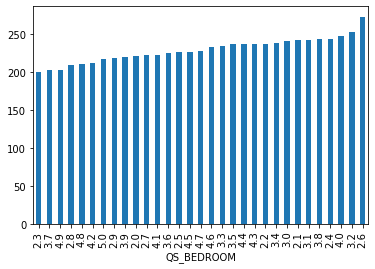

In [ ]:
df.groupby("QS_BEDROOM")["SALES_PRICE"].count().sort_values(ascending = True).plot.bar()

##19.QS_OVERALL

In [ ]:
df.QS_OVERALL.values

array([4.33 , 3.765, 3.09 , ..., 3.84 , 4.16 , 3.64 ])

In [ ]:
df.QS_OVERALL.isnull().sum()

48

In [ ]:
x=df.QS_OVERALL.mode()

df.QS_OVERALL.fillna(int(x), inplace=True)

In [ ]:
df.QS_OVERALL.isnull().sum()

0

In [ ]:
df.QS_OVERALL.value_counts()

3.000    82
3.540    59
3.260    57
3.320    56
3.560    55
         ..
4.615     1
4.115     1
2.090     1
3.645     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

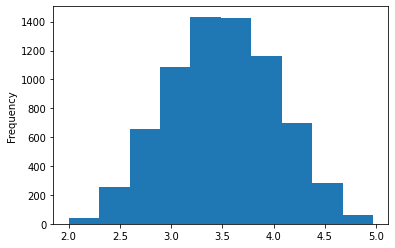

In [ ]:
df.QS_OVERALL.plot(kind='hist')

We see normal distribution

In [ ]:
fig = px.scatter(df, x='QS_OVERALL', y='SALES_PRICE')
fig.show()

In [ ]:
df=df.drop(columns="REG_FEE")#removing registration fee column

In [ ]:
df=df.drop(columns="COMMIS") #removing commision column

##20.SALES_PRICE

In [ ]:
df.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

In [ ]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [ ]:
df.SALES_PRICE.isnull().sum()

0

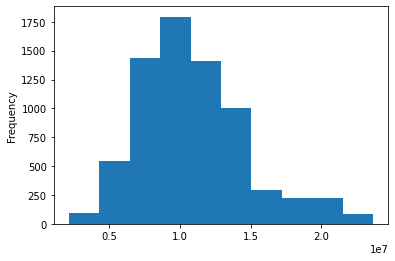

In [ ]:
df.SALES_PRICE.plot(kind='hist')

we see it is normal distribution with slightly right skewed data.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE              1.000000
AREA                     0.694149
INT_SQFT                 0.612125
N_ROOM                   0.602760
BUILDTYPE_Commercial     0.551058
MZZONE                   0.427789
N_BEDROOM                0.330987
STREET                   0.149589
PARK_FACIL               0.146428
N_BATHROOM               0.108834
SALE_COND                0.054370
UTILITY_AVAIL_All Pub    0.050266
QS_ROOMS                 0.021967
QS_BEDROOM               0.018804
QS_OVERALL               0.018794
DIST_MAINROAD            0.018783
UTILITY_AVAIL_NoSewr     0.004818
UTILITY_AVAIL_NoSeWa    -0.000290
QS_BATHROOM             -0.011377
UTILITY_AVAIL_ELO       -0.058934
Age                     -0.118842
BUILDTYPE_Others        -0.201783
BUILDTYPE_House         -0.344982
Name: SALES_PRICE, dtype: float64

##MODEL BUILDING

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,STREET,MZZONE,...,QS_OVERALL,SALES_PRICE,Age,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,0,1004,131,1.0,1.0,3,2,1,1,0,...,4.330,7600000,44,1,0,0,1,0,0,0
1,5,1986,26,2.0,1.0,5,2,0,2,3,...,3.765,21717770,11,1,0,0,1,0,0,0
2,1,909,70,1.0,1.0,3,2,1,2,4,...,3.090,13159200,20,1,0,0,0,1,0,0
3,3,1855,14,3.0,2.0,5,1,0,1,2,...,4.010,9630290,22,0,0,1,0,0,0,1
4,0,1226,84,1.0,1.0,3,2,1,2,1,...,3.290,7406250,30,0,0,1,1,0,0,0


Understanding the correlation between varies features in the dataset

1.positive correlation

2.Negative correlation

In [ ]:
correlation =df.corr()

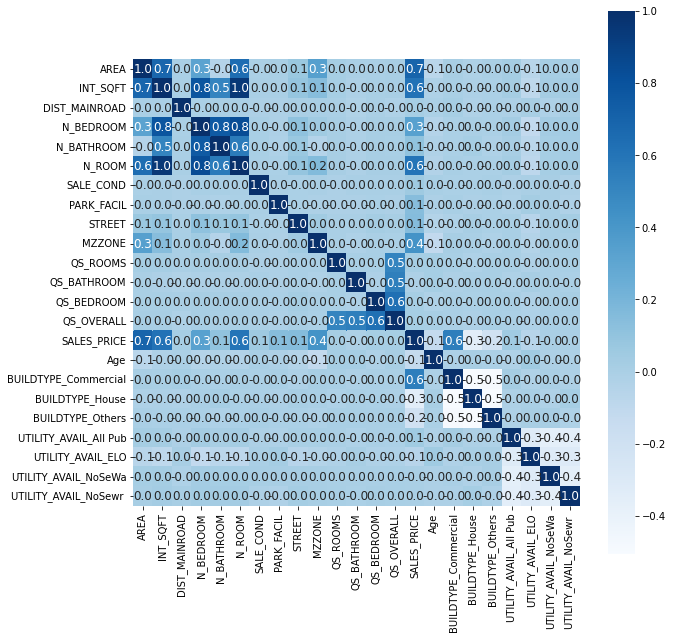

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

In [ ]:
#now, divide the dataset into two parts: independent variables and dependent variables
x = df.drop(columns='SALES_PRICE')
y = df.SALES_PRICE 

#splitting the dataset into training set and test set

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=5)

In [ ]:
print("X_train: ",x_train.shape)
print("X_test: ",x_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ",y_test.shape)

X_train:  (5687, 22)
X_test:  (1422, 22)
Y_train:  (5687,)
Y_test:  (1422,)


##SCALE THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #only transform the test dataset, dont fit it

##Linear Regression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.score(x_test, y_test)

0.9287573876043241

**Decision** **tree** **regressor**

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg.score(x_test, y_test)

0.9675673984081097

**Random** **forest** **regressor**

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg.score(x_test, y_test)

0.9863030617076517

**Ada** **Boost** **regressor**

In [ ]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(x_train, y_train)
ab_reg.score(x_test, y_test)

0.9230568439740746

**Gradient** **Boosting** **Regressor**

In [ ]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(x_train, y_train)
gb_reg.score(x_test, y_test)

0.9824334604479882

By using all this regressor, the best is extra gradient boosting regressor

 **XGB** **Regressor**

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.score(x_test, y_test)

0.990678990846599

In [ ]:
y_pred = xgb.predict(x_test)

In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.990678990846599


**Predicting** **the** **prices**

Predicting for training set:

In [ ]:
Y_pred_train =xgb.predict(x_train)

Predicting for test set:

In [ ]:
y_pred = xgb.predict(x_test)

**Evaluating** **accuracy** **with** **RMSLE**

Calculating RMSLE

In [ ]:
def rmsle(y_pred,y_test) :
  error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
  Acc = 1 - error
  return Acc

print("Accuracy attained on Training Set = ",rmsle(Y_pred_train, y_train))
print("Accuracy attained on Test Set = ",rmsle(y_pred,y_test))

Accuracy attained on Training Set =  0.9852949653352235
Accuracy attained on Test Set =  0.9835651165306039


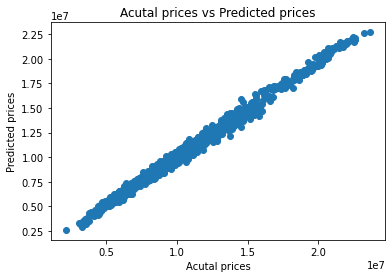

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Acutal prices')
plt.ylabel('Predicted prices')
plt.title("Acutal prices vs Predicted prices")
plt.show()

All the datapoints are very close to each other the value predicated by our model which is in y axis is very much similar to the actual price of the house given in the dataset